## Part I - Exploratory Data Analysis

In [63]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

Instructions: The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
# load json file for logins
file = 'data/logins.json'
f = open(file)
login_js = json.loads(f.read())
f.close()

In [3]:
login_js

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
# convert to a data frame
logins = pd.DataFrame(pd.to_datetime(login_js['login_time']), columns=['login_time'])
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# size of data
logins.shape

(93142, 1)

In [6]:
# check for missing values
logins.isna().sum()

login_time    0
dtype: int64

In [7]:
# set login time as index
logins.set_index('login_time', inplace=True)
# add count column
logins['count'] = 1
# aggregate login counts on 15 mins intervals
logins_count = logins.resample('15min').sum()
logins_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
logins_count.describe

<bound method NDFrame.describe of                      count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
...                    ...
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6

[9788 rows x 1 columns]>

Date is from 1970-01-01 to 1970-04-13

<AxesSubplot:xlabel='login_time'>

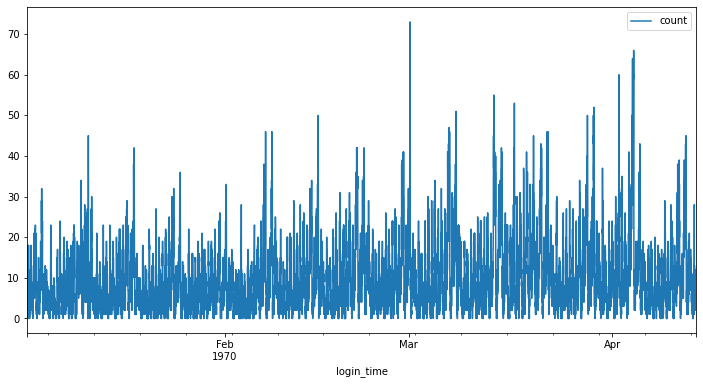

In [9]:
# plot the login
logins_count.plot(kind='line', figsize=(12,6))

There seems to be an increase in average logins

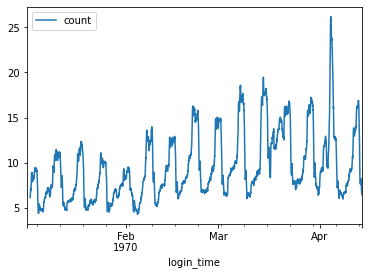

In [10]:
# plot a rolling window
logins_count.rolling(window=96).mean().plot()
plt.show()

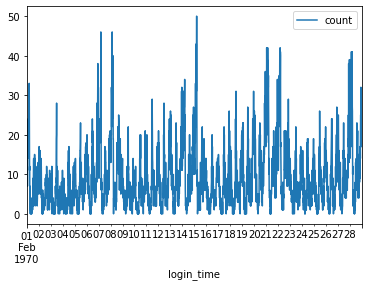

In [11]:
# plot logins for Feb
logins_count.loc['1970-02'].plot()
plt.show()

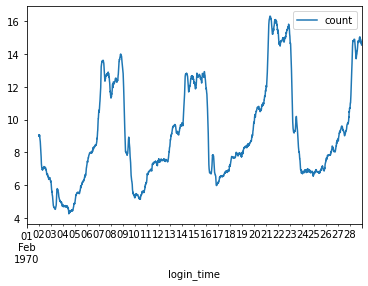

In [12]:
# plot a rolling window
logins_count.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

Looks like demand increases on weekends

In [13]:
# check which day is 1970-02-01
datetime.datetime(1970,2,1).weekday()

6

It is a Sunday

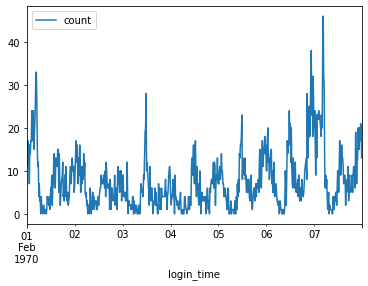

In [14]:
# plot the first week from Sunday, Feb 1st
logins_count.loc['1970-02-01': '1970-02-07'].plot()
plt.show()

The demand clearly increases on weekend

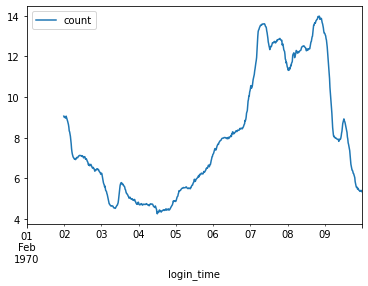

In [15]:
# plot a rolling window for better visual
logins_count.loc['1970-02-01':'1970-02-09'].rolling(window=96).mean().plot()
plt.show()

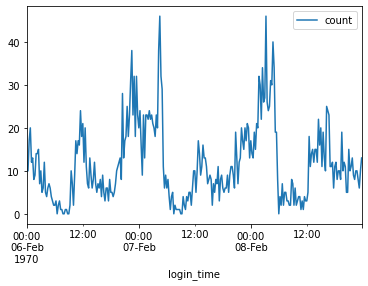

In [16]:
# plot one weekend to see details of demand increase
logins_count.loc['1970-02-06': '1970-02-08'].plot()
plt.show()

It seems that demand is highest around midnight during weekends

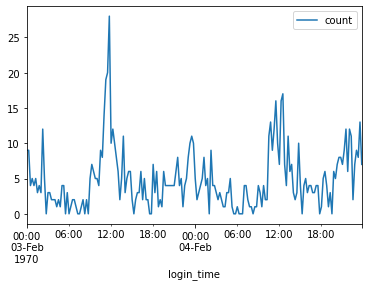

In [17]:
# plot weekdays
logins_count.loc['1970-02-03': '1970-02-04'].plot()
plt.show()

It seems that demand is highest at noon and midnight and lowest in early morning

In [18]:
# Plot March logins
# Check which day is Mar 1st
datetime.datetime(1970, 3,1).weekday()

6

Mar 1st is a Sunday

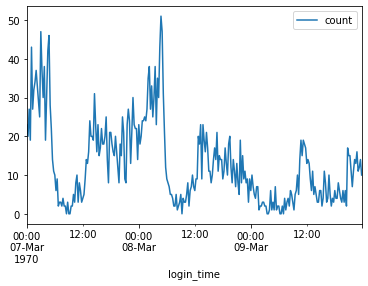

In [19]:
# Plot weekend of 1st week of March
logins_count.loc['1970-03-07': '1970-03-09'].plot()
plt.show()

Consistent with Feb, weekend demand is highest around midnight

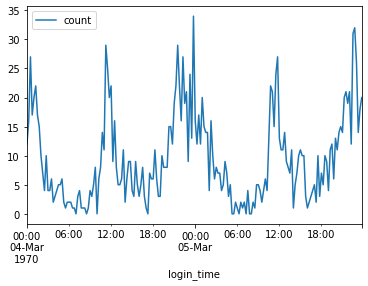

In [20]:
# plot weekday of march
logins_count.loc['1970-03-04': '1970-03-05'].plot()
plt.show()

Consistent with Feb, weekday demand is highest around noon and midnight and lowest in early morning

In [21]:
# plot weekend of april 
# check which day is apr 1
datetime.datetime(1970,4,1).weekday()

2

Apr 1st is a Tuesday

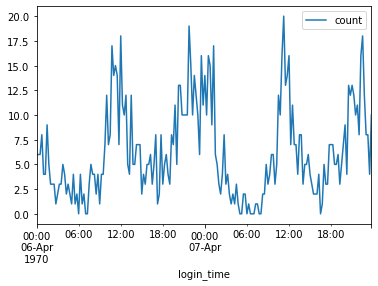

In [22]:
# plot 1st weekend of april
logins_count.loc['1970-04-06': '1970-04-07'].plot()
plt.show()

Weekend demand is highest around midnight and noon

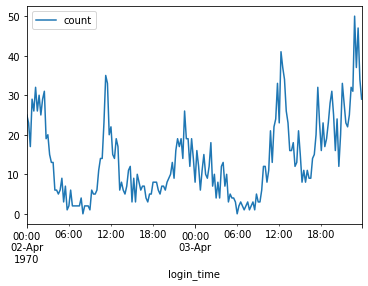

In [23]:
# plot weekday of april
logins_count.loc['1970-04-02': '1970-04-03'].plot()
plt.show()

Consistent with Feb and March, weekday demand is highest around noon and midnight and lowest in early morning

<b>Conclusion from EDA<b>: 
- Login demand is higher on weekends than weekdays
- Login demand is highest around midnight and noon for both weekends and weekdays

## Part II - Experiment and Metrics Design

To measure the success of encouraging driver partners to serve both cities, it is possible to record the time duration individual drivers spend in each city. It could be converted to percentage of time during working hours they spend in each city accordingly as well. A feasible measure to track the time would be simply using the mobile app on their phone that enables location sharing. 

However, it is important to consider the circadian rhythms in each city: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. So even if the location/time tracking takes place on weekdays, drivers' behavior would probably stay the same regardless of the toll reimbursement incentive. Therefore, since all drivers have same level of activity in both cities on weekend, it is proposed that location/time tracking should take place during weekend.

Based on Central Limit Theorem, if the sample size is large, the sampling distribution of the mean would approach a normal distribution. A t-distribution could be used because there is a high number of degrees of freedom in a large population. And a z-test could be performed to find mean differences.

Experiment Design:
- Extract a random sample of more than 100 drivers
- Calculate the percentage of time they spend in each city on weekends
- Give and inform all drivers the toll reimbursement incentive for a period of time (cannot be too short, preferrably few months)
- After the incentive period, sample the drivers again and calculate the percentage of time they spend in each city on weekends
- Test samples using z-test at 95% confidence level (two-talied)
    - H0: There is no change in mean time spent in Gotham and Metropolis
    - H1: There is a significant change in the mean time spent in Gotham and Metropolis
- Note: 
    - The greater the sample size, the higher chance of being statistically significant
    - Exclude data from holidays or special events occured on weekends in either city

If the test z score is less than or greater than the norm z-score, then it could be concluded that toll reimbursement incentive is siginificantly effective in encouraging drivers to serve both cities. The company should also consider the net profits from total expense on toll reimbursement as well as the increased revenue from the inventive. 


## Part III - Predictive Modeling

In [24]:
# load json file 
file = 'data/ultimate_data_challenge.json'
f = open(file)
data_js = json.loads(f.read())
f.close()

In [25]:
data_js

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [26]:
# convert to a data frame
data = pd.DataFrame.from_dict(data_js)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
# check size
data.shape

(50000, 12)

In [28]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
# check trips in first 30 days
data_trip_counts = data['trips_in_first_30_days'].value_counts(normalize=True)*100
data_trip_counts.head(10)

0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
7     1.638
8     1.178
9     0.942
Name: trips_in_first_30_days, dtype: float64

In [30]:
# What fraction of the observed users were retained?
data_trip_counts[1:].sum()

69.22

Around 69% of users were retained.

#### Data Wrangling

In [31]:
# check missing values
data.isna().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

In [32]:
# drop missing values for those without a phone
data = data.dropna(subset=['phone'])
data.isna().sum().sort_values(ascending=False)

avg_rating_of_driver      8026
avg_rating_by_driver       198
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

In [33]:
# take a look at 'avg_rating_of_driver' 
data['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [34]:
# take a look at 'avg_rating_by_driver' 
data['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

For both variables, the best way to fill the missing values will be to use the median (since the ranges are huge)

In [35]:
# fill missing values with median
of_driver_median = data['avg_rating_of_driver'].median()
data['avg_rating_of_driver'].fillna(of_driver_median, inplace=True)

by_driver_median = data['avg_rating_by_driver'].median()
data['avg_rating_by_driver'].fillna(by_driver_median, inplace=True)

# check missing values again
data.isna().sum().sort_values(ascending=False)

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [36]:
# check cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


#### Feature Engineering

In [37]:
# convert 'last_trip_date' to timestamp
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
# set current date
current = data['last_trip_date'].max()

In [38]:
# see how long it passes since first day
first_day = data['last_trip_date'].min()
int((current - first_day).days/30)

6

6 months has passed

In [39]:
# create a column to record active or not
data['active'] = data['last_trip_date'].apply(lambda date: 0 if (current-date).days>30 else 1)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [40]:
# create dummy variables for categorical features
data_cat = pd.get_dummies(data, columns=['city','phone','ultimate_black_user'])
data_cat.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [41]:
# drop unrelated columns
data_new = data_cat.drop(['signup_date','last_trip_date','ultimate_black_user_False'], axis=1)

In [42]:
# rename some columns and make all lower case
data_new = data_new.rename(columns={'ultimate_black_user_True': 'ultimate_black_user'})
data_new.columns = data_new.columns.str.lower()

In [43]:
# check cleaned dataset
data_new.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_astapor,city_king's landing,city_winterfell,phone_android,phone_iphone,ultimate_black_user
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,0


In [44]:
# check size
data_new.shape

(49604, 14)

#### EDA

<AxesSubplot:xlabel='active', ylabel='count'>

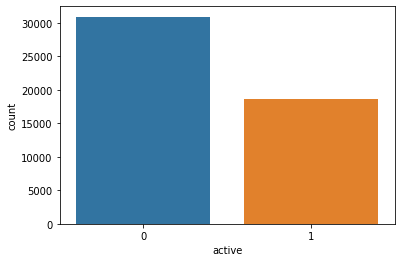

In [45]:
# check target variable
sns.countplot(data=data_new, x='active')

In [46]:
data_new['active'].value_counts(normalize=True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

Around 62% of users are active

<AxesSubplot:xlabel='active', ylabel='count'>

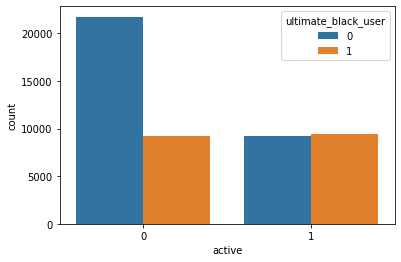

In [47]:
# check black user effect on active
sns.countplot(data=data_new, x='active', hue='ultimate_black_user')

No significant effect of black user effect on active users

<AxesSubplot:xlabel='active', ylabel='count'>

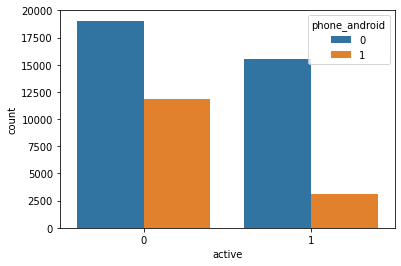

In [48]:
# check andriod user effect on active
sns.countplot(data=data_new, x='active', hue='phone_android')

More inactive users are using andriod.

<AxesSubplot:xlabel='active', ylabel='count'>

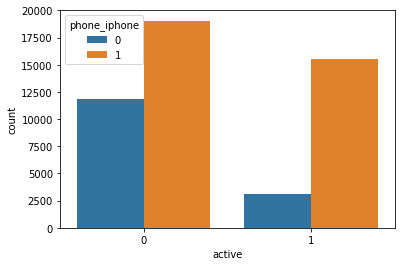

In [49]:
# check iphone user effect on active
sns.countplot(data=data_new, x='active', hue='phone_iphone')

More active users are using iphone

<AxesSubplot:xlabel='active', ylabel='count'>

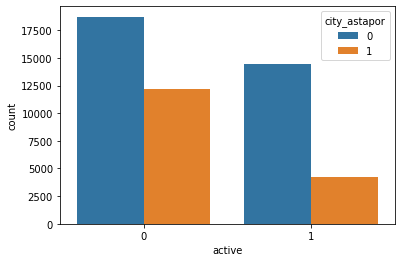

In [50]:
# check city effect on active
sns.countplot(data=data_new, x='active', hue='city_astapor')

<AxesSubplot:xlabel='active', ylabel='count'>

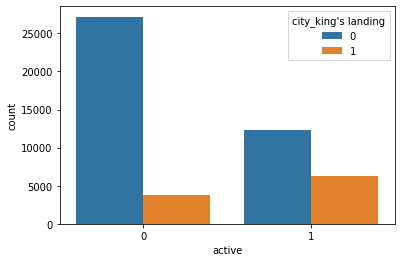

In [51]:
sns.countplot(data=data_new, x='active', hue="city_king's landing")

<AxesSubplot:xlabel='active', ylabel='count'>

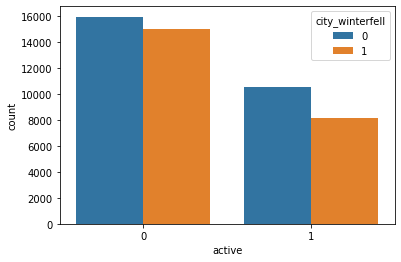

In [52]:
sns.countplot(data=data_new, x='active', hue='city_winterfell')

There is evident effects of Astapor and King's Land on active users: more inactive users in both cities

#### Modeling

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [55]:
# scale the data
sscaler = StandardScaler()
data_new['trips_in_first_30_days'] = sscaler.fit_transform(data_new[['trips_in_first_30_days']])
data_new['avg_rating_of_driver'] = sscaler.fit_transform(data_new[['avg_rating_of_driver']])
data_new['avg_surge'] = sscaler.fit_transform(data_new[['avg_surge']])
data_new['surge_pct'] = sscaler.fit_transform(data_new[['surge_pct']])
data_new['weekday_pct'] = sscaler.fit_transform(data_new[['weekday_pct']])
data_new['avg_dist'] = sscaler.fit_transform(data_new[['avg_dist']])
data_new['avg_rating_by_driver'] = sscaler.fit_transform(data_new[['avg_rating_by_driver']])

In [56]:
data_new.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_astapor,city_king's landing,city_winterfell,phone_android,phone_iphone,ultimate_black_user
0,0.454159,0.087233,0.112318,0.326417,-0.395941,-0.373113,0.495597,1,0,1,0,0,1,1
1,-0.600342,0.608234,-0.336789,-0.444014,-0.293477,0.436461,0.495597,0,1,0,0,1,0,0
2,0.190534,-0.607435,-0.336789,-0.444014,1.054746,-0.884608,0.495597,0,1,0,0,0,1,0
3,1.772286,-0.086434,0.291961,0.556545,0.515457,-0.604167,0.271601,1,0,1,0,0,1,1
4,3.090412,-0.433768,0.516515,0.146316,0.580172,-0.468357,0.271601,0,0,0,1,1,0,0


In [58]:
# split training and testing data
X = data_new.drop(['active'],axis=1).values
y = data_new['active'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=123)

In [59]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)

(49604, 13) (49604,)
(39683, 13) (39683,)


Since it is a classification problem (predicting whether the users are active), I will include the following models:
- K-Nearest Neighbor (KNN)
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Naive Bayes
- Gradient Boosting

In [60]:
# Import all model packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [61]:
# Build a pipeline to fit all models
# We use default parameters for all models at first
model_pipe = [] # create an empty list to store all models

model_pipe.append(KNeighborsClassifier()) # knn
model_pipe.append(LogisticRegression(solver='liblinear')) # logistic regression
model_pipe.append(RandomForestClassifier()) # random forest
model_pipe.append(SVC()) # svc
model_pipe.append(GaussianNB()) # naive bayes
model_pipe.append(GradientBoostingClassifier()) # gradient boosting

In [64]:
# Build a pipeline for model evaluation
# We will use Accuracy, Cross-Validation, AUC, and Confusion Matrix

acc_score = []
cv_score = []
auc_score = []
cm_score = []

for model in model_pipe:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
    kf = KFold(n_splits=6, shuffle=True, random_state=123)
    cv_score.append(np.mean(cross_val_score(model,X_train,y_train, cv=kf)))
    auc_score.append(roc_auc_score(y_test, y_pred))
    cm_score.append(confusion_matrix(y_test, y_pred))

In [65]:
# Train the model to get ROC and AUC results
table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

for m in model_pipe:
    model = m.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, ypred)
    auc = roc_auc_score(y_test, ypred)
    
    table = table.append({'classifiers': m.__class__.__name__,
                        'fpr': fpr,
                        'tpr': tpr,
                        'auc': auc}, ignore_index=True)
    
table.set_index('classifiers', inplace=True)

/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_51762/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_51762/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_51762/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_51762/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

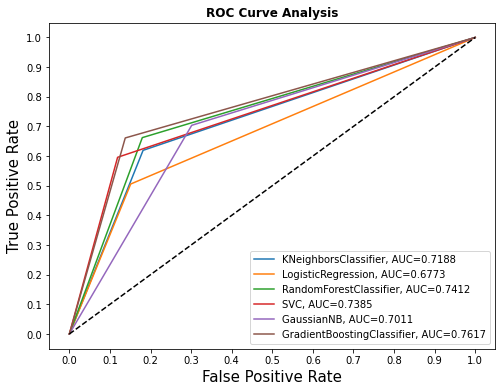

In [66]:
# Plot ROC curves
fig = plt.figure(figsize=(8,6))

for i in table.index:
    plt.plot(table.loc[i]['fpr'],
            table.loc[i]['tpr'],
            label='{}, AUC={:.4f}'.format(i, table.loc[i]['auc']))
plt.plot([0,1],[0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold')
plt.legend(loc='lower right')

plt.show()

In [67]:
# Now we can see how each model performs
model_list = ['KNN', 'Logistic Regression', 'Random Forest',
             'SVC', 'Naive Bayes', 'Gradient Boosting']
evaluation_df = pd.DataFrame({'Model': model_list, 
                              'Accuracy': acc_score,
                              'CV': cv_score,
                             'AUC': auc_score})
evaluation_df

,Model,Accuracy,CV,AUC
0,KNN,0.744885,0.742661,0.718838
1,Logistic Regression,0.722205,0.717108,0.677296
2,Random Forest,0.765447,0.753875,0.745048
3,SVC,0.775829,0.772900,0.738490
4,Naive Bayes,0.700433,0.700930,0.701114
5,Gradient Boosting,0.788025,0.784316,0.761696


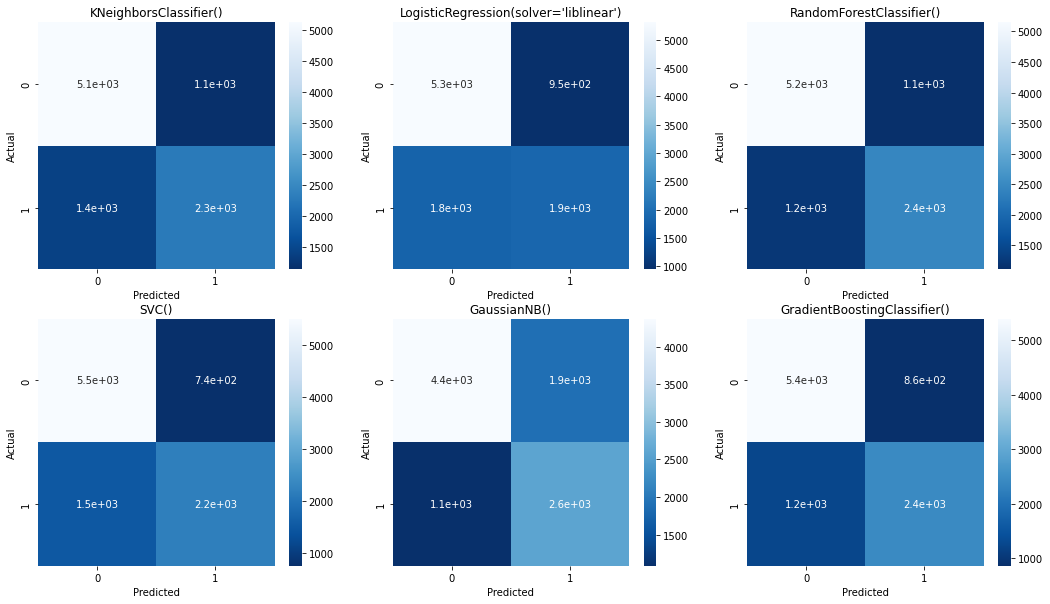

In [68]:
# Now we create a confusion matrix for the results
fig = plt.figure(figsize=(18,10))

for i in range(len(cm_score)):
    cm = cm_score[i]
    model = model_pipe[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    _ = sns.heatmap(cm, annot=True,cmap='Blues_r')
    _.set_xlabel('Predicted')
    _.set_ylabel('Actual')

From the above metrics, we can see that Gradient Boosting has the highest Accuracy, CV, and AUC score, followed by Random Forest. We can try with hyperparameter tuning for optimal performance.

#### Hyperparameter tuning

##### Random Forest

In [71]:
# Apply Gridsearch CV for Random Forest
rf = RandomForestClassifier(random_state=123)
params = {'n_estimators': [100, 500],
        'criterion': ['gini','entropy']
         }
cv_rf = GridSearchCV(estimator=rf, param_grid=params, cv=5)
cv_rf.fit(X_train, y_train)

print(cv_rf.best_estimator_)
print(cv_rf.best_score_)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=123)
0.7550337753051247


In [72]:
# Train our data with optimized random forest model
rf = RandomForestClassifier(criterion = 'entropy',
                           n_estimators=500,
                           random_state=123)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)

# Accuracy score
acc = round(accuracy_score(y_test, ypred),4)
# CV score
cv = round(cross_val_score(rf, X_test, y_test, scoring = 'roc_auc').mean(),4)
# ROC-AUC score
rf_optimized_y = rf.predict_proba(X_test)[:,1]
rf_optimized_auc = round(roc_auc_score(y_test, rf_optimized_y),4)

print(f'Accuracy score for optimized random forest model: {acc}')
print(f'Cross validation score for optimized random forest model: {cv}')
print(f'AUC score for optimized random forest model: {rf_optimized_auc}')

Accuracy score for optimized random forest model: 0.7634
Cross validation score for optimized random forest model: 0.818
AUC score for optimized random forest model: 0.8279


In [73]:
# Feature importance of optimized random forest
names = list((data_new.drop(['active'],
              axis=1)).columns)
importance = np.sort(list(rf.feature_importances_))
importance_df = pd.DataFrame({'Features': names,
                             'Importance scores': importance})
importance_df

,Features,Importance scores
0,trips_in_first_30_days,0.010462
1,avg_rating_of_driver,0.014381
2,avg_surge,0.016452
3,surge_pct,0.017285
4,weekday_pct,0.027754
5,avg_dist,0.039134
6,avg_rating_by_driver,0.062969
7,city_astapor,0.073460
8,city_king's landing,0.085418
9,city_winterfell,0.085621


Based on optimized random forest model, 'ultimate_black_user' is the most important feature predicting active users.

##### Gradient Boosting

In [76]:
# Apply Gridsearch CV for Gradient Boost
gb = GradientBoostingClassifier(random_state=123)
params = {'min_samples_leaf':[100,150],
         'max_depth': [4,8]
         }
cv_gb = GridSearchCV(estimator=gb, param_grid=params, cv=5)
cv_gb.fit(X_train, y_train)

print(cv_gb.best_estimator_)
print(cv_gb.best_score_)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=100, random_state=123)
0.789280147695359


In [77]:
# Train our data with optimized gradient boosting model
gb = GradientBoostingClassifier(min_samples_leaf=100,
                                max_depth=8,
                               random_state=123)
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)

# Accuracy score
acc = round(accuracy_score(y_test, ypred),4)
# CV score
cv = round(cross_val_score(gb, X_test, y_test, scoring = 'roc_auc').mean(),4)
# ROC-AUC score
gb_optimized_y = gb.predict_proba(X_test)[:,1]
gb_optimized_auc = round(roc_auc_score(y_test, gb_optimized_y),4)

print(f'Accuracy score for optimized gradient boosting model: {acc}')
print(f'Cross validation score for optimized gradient boosting model: {cv}')
print(f'AUC score for optimized gradient boosting model: {rf_optimized_auc}')

Accuracy score for optimized gradient boosting model: 0.791
Cross validation score for optimized gradient boosting model: 0.846
AUC score for optimized gradient boosting model: 0.8279


In [78]:
# Feature importance of optimized gradient boosting
names = list((data_new.drop(['active'],
              axis=1)).columns)
importance = np.sort(list(gb.feature_importances_))
importance_df = pd.DataFrame({'Features': names,
                             'Importance scores': importance})
importance_df

,Features,Importance scores
0,trips_in_first_30_days,0.005357
1,avg_rating_of_driver,0.018120
2,avg_surge,0.020289
3,surge_pct,0.031006
4,weekday_pct,0.032479
5,avg_dist,0.043796
6,avg_rating_by_driver,0.053947
7,city_astapor,0.056260
8,city_king's landing,0.063368
9,city_winterfell,0.099158


Based on optimized gradient boosting model, 'ultimate_black_user' is the most important feature predicting active users.

#### Conclusion

- From the results, Gradient Boosting is our best model for predicting active users
- Highest accuracy score of GB is 0.7910, compared to RF 0.7634
- Both Random Forest and Gradient Boosting agree on the most predicting features on active users: 'ultimate_black_user'
- It is also worth noticing that whether using an Iphone is also an important indicator for being active or not